In [3]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)
a_year_ago=pd.to_datetime(last_date[0])-dt.timedelta(days=365)
print(a_year_ago)


('2017-08-23',)
2016-08-23 00:00:00


In [19]:
#Perform a query to retrieve the data and precipitation scores
last_twelve=session.query(Measurement.date,func.avg(Measurement.prcp)).\
filter(Measurement.date>='2016-08-23').\
group_by(Measurement.date).\
order_by(Measurement.date).all()
last_twelve
#Save the query results as a Pandas DataFrame and set the index to the date column
last_twleve_df=pd.DataFrame(last_twelve,columns=["date", "precipitation"])
print(last_twleve_df)
lt_dt_sort=last_twleve_df.sort_values(by=['date'])
lt_dt_sort.head(7)
lt_dt_sort1=lt_dt_sort.dropna()
lt_dt_sort1.head(15)
lt_dt_sort11=lt_dt_sort1
print(lt_dt_sort1)
lt_dt_sort11.set_index('date',inplace=True)

           date  precipitation
0    2016-08-23       0.451667
1    2016-08-24       1.555000
2    2016-08-25       0.077143
3    2016-08-26       0.016667
4    2016-08-27       0.064000
..          ...            ...
361  2017-08-19       0.030000
362  2017-08-20       0.005000
363  2017-08-21       0.193333
364  2017-08-22       0.166667
365  2017-08-23       0.132500

[366 rows x 2 columns]
           date  precipitation
0    2016-08-23       0.451667
1    2016-08-24       1.555000
2    2016-08-25       0.077143
3    2016-08-26       0.016667
4    2016-08-27       0.064000
..          ...            ...
361  2017-08-19       0.030000
362  2017-08-20       0.005000
363  2017-08-21       0.193333
364  2017-08-22       0.166667
365  2017-08-23       0.132500

[366 rows x 2 columns]


            precipitation
date                     
2016-08-23       0.451667
2016-08-24       1.555000
2016-08-25       0.077143
2016-08-26       0.016667
2016-08-27       0.064000
...                   ...
2017-08-19       0.030000
2017-08-20       0.005000
2017-08-21       0.193333
2017-08-22       0.166667
2017-08-23       0.132500

[366 rows x 1 columns]


(736188.0, 736566.0)

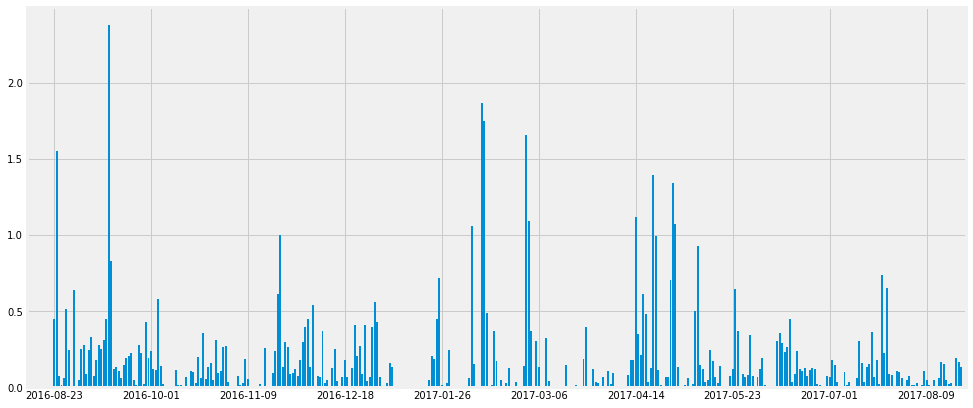

In [20]:
# Import mdates to only show certain date on x axis
import matplotlib.dates as mdates

#Convert index to date time form
lt_dt_sort11.index=pd.to_datetime(lt_dt_sort11.index)
print(lt_dt_sort11)

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(15,7))
ax.grid(zorder=0)
ax.bar(lt_dt_sort11.index, lt_dt_sort11['precipitation'])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=39))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xlim(pd.Timestamp('2016-08-12'), pd.Timestamp('2017-08-25'))

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lt_dt_sort1.describe()

,precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [22]:
# Design a query to show how many stations are available in this dataset?
print(session.query(func.count(Station.name)).all()[0][0]) 

9


In [23]:
# List the stations and the counts in descending order.
observation_counts=session.query(Measurement.station,func.count(Measurement.id)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.id).desc()).all()

# Covert result to DataFrame for better appearence
station_count_df= pd.DataFrame(observation_counts, columns=['Station', 'Observation_counts'])
print(station_count_df)

# What are the most active stations? (i.e. what stations have the most rows)?
Most_Active_Station=observation_counts[0][0]
print(Most_Active_Station)

       Station  Observation_counts
0  USC00519281                2772
1  USC00519397                2724
2  USC00513117                2709
3  USC00519523                2669
4  USC00516128                2612
5  USC00514830                2202
6  USC00511918                1979
7  USC00517948                1372
8  USC00518838                 511
USC00519281


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_record=session.query(Measurement.station,func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.id).desc()).all()
station_record
station_record_df= pd.DataFrame(station_record, columns=['Station', 'Minimum Temperature','Maximum Temperature','Average Temperature'])
station_record_df

,Station,Minimum Temperature,Maximum Temperature,Average Temperature
0,USC00519281,85.0,54.0,71.663781
1,USC00519397,87.0,56.0,74.553231
2,USC00513117,85.0,59.0,72.689184
3,USC00519523,85.0,56.0,74.543649
4,USC00516128,84.0,58.0,70.915008
5,USC00514830,85.0,58.0,74.873297
6,USC00511918,87.0,53.0,71.615968
7,USC00517948,87.0,58.0,74.684402
8,USC00518838,83.0,58.0,72.724070


USC00519281


Text(0.5, 1.0, ' Historgram of Temperature')

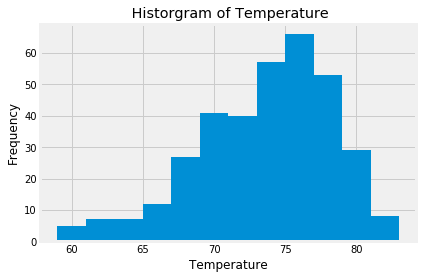

In [26]:
# Choose the station with the highest number of temperature observations.
Station_list=session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
MA_station=Station_list[0][0]
print(MA_station)

# Query the last 12 months of temperature observation data for this station
MA_station_data=session.query(Measurement.date,Measurement.tobs).\
filter(Measurement.date>='2016-08-23').\
filter(Measurement.station==MA_station).all()

#Convert query result into DataFrame
MA_station_df= pd.DataFrame(MA_station_data, columns=['Date', 'Temperature'])
MA_station_df.head()

#plot the results as a histogram
plt.hist(MA_station_df.Temperature,bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(" Historgram of Temperature")



## Bonus Challenge Assignment

In [56]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp=calc_temps('2016-05-01', '2016-05-16')
print(temp)

[(65.0, 73.2871287128713, 79.0)]


73.2871287128713

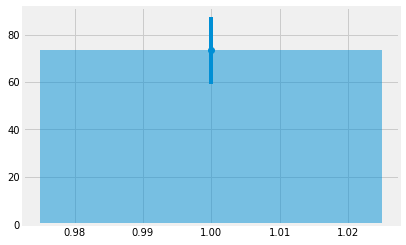

In [48]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar([1,], [temp[0][1],],width = 0.05, alpha=0.5)
x = [1,]
y = [temp[0][1], ]
e = temp[0][2]-temp[0][0]
plt.errorbar(x, y, yerr=e, fmt='o')
plt.show()

In [61]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#Define function
def prcp_temps(start_date, end_date):
    return session.query(Measurement.station, func.sum(Measurement.prcp)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
    group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
    
total_prcp=prcp_temps('2016-05-01', '2016-05-16')
pd.DataFrame(total_prcp,columns=['Station', 'Totoal Precipitation'])

,Station,Totoal Precipitation
0,USC00516128,4.32
1,USC00519281,3.90
2,USC00513117,3.80
3,USC00519523,3.06
4,USC00514830,1.07
5,USC00517948,0.44
6,USC00519397,0.19


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
